# Degeneracy Detection on Planck 2018 ΛCDM Chains

Load Planck 2018 base ΛCDM posterior samples (TTTEEE+lowl+lowE+lensing),
run the degeneracy detector, and compare discovered relationships against
known cosmological degeneracies.

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, '/anvil/scratch/x-ctirapongpra/degen_detector/')
from degen_detector import DegenDetector
from getdist import loadMCSamples

%matplotlib inline
plt.rcParams.update({'font.size': 16, 'figure.figsize': (14, 10)})

## 1. Load Planck chains

In [3]:
chain_root = '../data/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing'
mc_samples = loadMCSamples(chain_root, settings={'ignore_rows': 0.3})

# Extract key cosmological parameters
target_params = ['omegam', 'H0', 'sigma8', 'ns', 'tau', 'logA']
param_obj = mc_samples.getParams()
samples = np.column_stack([getattr(param_obj, p) for p in target_params])

print(f'Samples shape: {samples.shape}')
print(f'Parameters: {target_params}')
print(f'\nMeans:')
for i, p in enumerate(target_params):
    print(f'  {p:>10s} = {np.mean(samples[:, i]):.5f} ± {np.std(samples[:, i]):.5f}')

../data/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing_1.txt
../data/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing_2.txt
../data/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing_3.txt
../data/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing_4.txt
Removed no burn in
Samples shape: (25225, 6)
Parameters: ['omegam', 'H0', 'sigma8', 'ns', 'tau', 'logA']

Means:
      omegam = 0.31531 ± 0.00737
          H0 = 67.35755 ± 0.53881
      sigma8 = 0.81119 ± 0.00602
          ns = 0.96489 ± 0.00417
         tau = 0.05437 ± 0.00736
        logA = 3.04448 ± 0.01424


## 2. Run degeneracy detector

In [4]:
detector = DegenDetector(samples, target_params)
results = detector.search_couplings(
    params=target_params,  # explicit parameter list
    coupling_depth=2,      # search for pairs
    r2_threshold=0.95,     # early stop threshold
    niterations=100,
    max_complexity=15,
    batching=True,
)

print(f'Fits attempted: {results.n_fits_attempted}/{results.n_fits_total}')
print(f'Early stop: {results.stopped_early}')

# Show all successful fits ranked by R²
successful = [f for f in results.fits if f.fit is not None]
successful.sort(key=lambda f: f.fit.r_squared, reverse=True)

print(f'\nSuccessful fits: {len(successful)}')
for i, cf in enumerate(successful):
    print(f'  {i+1}. {cf.fit.equation_str}')
    print(f'     R² = {cf.fit.r_squared:.4f}, MI = {cf.mi_score:.3f}')

Computing mutual information matrix...


Compiling Julia backend...


Selected 6 parameters: ['omegam', 'H0', 'sigma8', 'ns', 'tau', 'logA']
Generated 15 2-tuples, ranked by min MI
Fitting 1/15: ['omegam', 'H0'] (MI=2.0712)


[ Info: Started!



Expressions evaluated per second: 2.550e+03
Progress: 366 / 1500 total iterations (24.400%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.438e-05  0.000e+00  y = 0.31532
3           2.385e-05  4.121e-01  y = 21.236 / H0
5           9.369e-07  1.619e+00  y = (H0 * -0.013405) + 1.2182
7           9.365e-07  2.068e-04  y = ((H0 + H0) * -0.0068477) + 1.2379
8           9.255e-07  1.181e-02  y = (sqrt(H0 + H0) * -0.15877) + 2.1582
9           9.253e-07  1.922e-04  y = (((H0 + H0) + 0.0464) * -0.0067969) + 1.2313
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluate

[ Info: Final population:
[ Info: Results saved to:


  - outputs/20260226_094310_lu9UiQ/hall_of_fame.csv

Expressions evaluated per second: 2.910e+03
Progress: 384 / 1500 total iterations (25.600%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.903e-01  0.000e+00  y = 67.358
3           2.827e-01  1.334e-02  y = 67.659 - omegam
4           2.659e-01  6.122e-02  y = 66.206 - log(omegam)
5           4.842e-03  4.006e+00  y = (7.1635 / omegam) + 44.626
6           4.811e-03  6.442e-03  y = 40.984 - (log(omegam) * 22.846)
8           4.803e-03  8.100e-04  y = log(exp((25.638 / sqrt(omegam)) - -21.692))
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop 

[ Info: Started!



Expressions evaluated per second: 2.690e+03
Progress: 705 / 1500 total iterations (47.000%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.903e-01  0.000e+00  y = 67.358
3           2.827e-01  1.334e-02  y = 67.659 - omegam
4           6.559e-03  3.763e+00  y = exp(4.5251 - omegam)
5           4.842e-03  3.036e-01  y = (7.1635 / omegam) + 44.626
6           4.811e-03  6.442e-03  y = 40.984 - log(omegam ^ 22.846)
8           4.803e-03  8.098e-04  y = log(exp((25.638 / sqrt(omegam)) - -21.692))
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 2.

[ Info: Final population:
[ Info: Results saved to:


  -> R² = 0.9833: omegam = (61.23697 / H0) - 0.59388566
Early stop: R² >= 0.95
Fits attempted: 1/15
Early stop: True

Successful fits: 1
  1. omegam = (61.23697 / H0) - 0.59388566
     R² = 0.9833, MI = 2.071
  - outputs/20260226_094344_pCV7j9/hall_of_fame.csv


## 3. Mutual Information Heatmap

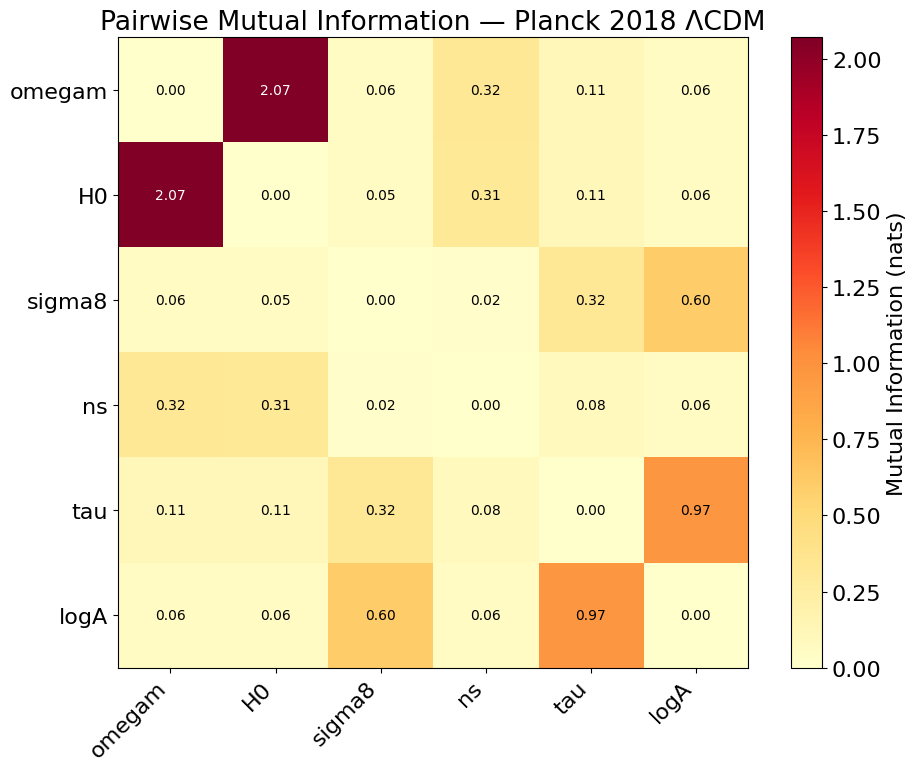

In [5]:
mi = results.mi_result.mi_matrix
names = results.mi_result.param_names

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(mi, cmap='YlOrRd')
ax.set_xticks(range(len(names)))
ax.set_yticks(range(len(names)))
ax.set_xticklabels(names, rotation=45, ha='right')
ax.set_yticklabels(names)

# Annotate cells
for i in range(len(names)):
    for j in range(len(names)):
        ax.text(j, i, f'{mi[i,j]:.2f}', ha='center', va='center',
                color='white' if mi[i,j] > mi.max()/2 else 'black', fontsize=10)

plt.colorbar(im, label='Mutual Information (nats)')
ax.set_title('Pairwise Mutual Information — Planck 2018 ΛCDM')
plt.tight_layout()
plt.show()

## 4. Parameter scatter plots with discovered equations

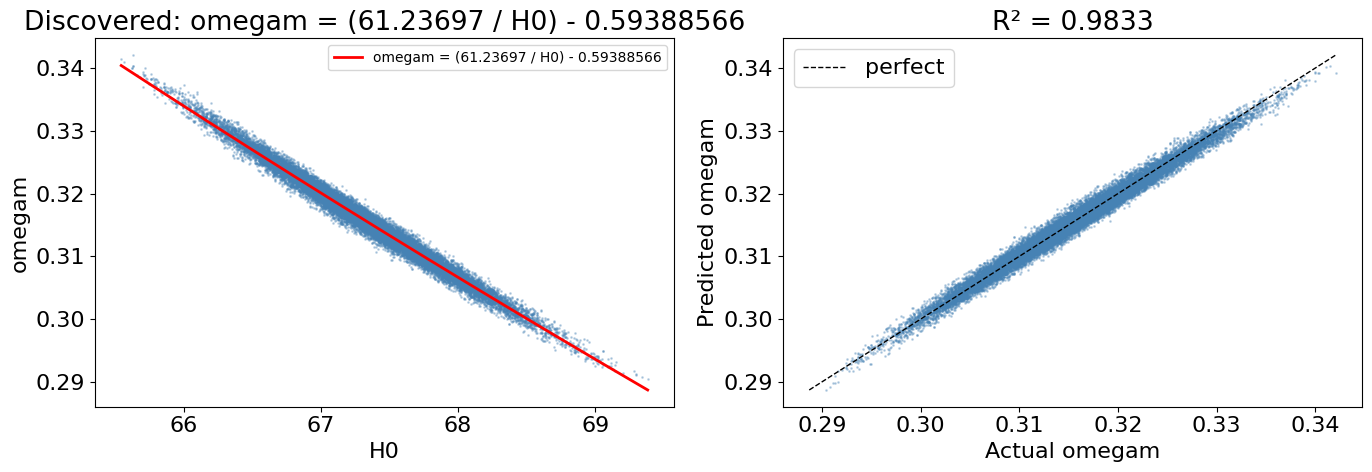

In [6]:
# Plot top fits (successful fits already sorted by R² in previous cell)
for cf in successful[:5]:  # Show top 5 fits
    fit = cf.fit

    # Get input and target data
    target_idx = target_params.index(fit.target_name)
    input_indices = [target_params.index(n) for n in fit.input_names]
    y_actual = samples[:, target_idx]
    X_input = samples[:, input_indices]
    y_pred = fit.predict(X_input)

    if len(fit.input_names) == 1:
        # 2D scatter: input vs target
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Left: raw scatter
        ax = axes[0]
        ax.scatter(X_input[:, 0], y_actual, s=1, alpha=0.3, c='steelblue')
        # Overlay predicted curve
        sort_idx = np.argsort(X_input[:, 0])
        ax.plot(X_input[sort_idx, 0], y_pred[sort_idx], 'r-', lw=2,
                label=fit.equation_str)
        ax.set_xlabel(fit.input_names[0])
        ax.set_ylabel(fit.target_name)
        ax.legend(fontsize=10)
        ax.set_title(f'Discovered: {fit.equation_str}')

        # Right: predicted vs actual
        ax = axes[1]
        ax.scatter(y_actual, y_pred, s=1, alpha=0.3, c='steelblue')
        lims = [min(y_actual.min(), y_pred.min()), max(y_actual.max(), y_pred.max())]
        ax.plot(lims, lims, 'k--', lw=1, label='perfect')
        ax.set_xlabel(f'Actual {fit.target_name}')
        ax.set_ylabel(f'Predicted {fit.target_name}')
        ax.set_title(f'R² = {fit.r_squared:.4f}')
        ax.legend()

    else:
        # Multi-input: predicted vs actual only
        fig, ax = plt.subplots(figsize=(7, 5))
        ax.scatter(y_actual, y_pred, s=1, alpha=0.3, c='steelblue')
        lims = [min(y_actual.min(), y_pred.min()), max(y_actual.max(), y_pred.max())]
        ax.plot(lims, lims, 'k--', lw=1, label='perfect')
        ax.set_xlabel(f'Actual {fit.target_name}')
        ax.set_ylabel(f'Predicted {fit.target_name}')
        ax.set_title(f'{fit.equation_str}\nR² = {fit.r_squared:.4f}')
        ax.legend()

    plt.tight_layout()
    plt.show()